 # Chapter 2: More Image Transformation and Manipulation

## Problems

## 1. Applying Euclidean and Affine Transformation on an image

### 1.1 Rotating an image with scipy.ndimage

In [2]:
from IPython.core.display import display,HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))

In [3]:
# comment the next line only if you are not running this code from jupyter notebook
%matplotlib inline

from scipy.ndimage import rotate
from skimage.io import imread
import matplotlib.pylab as plt

im = imread('images/Img_02_04.jpg') 

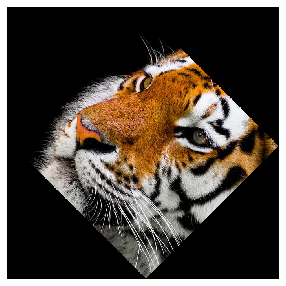

In [7]:
im = rotate(im, -45) 
plt.figure(figsize=(5,5))
plt.imshow(im)
plt.axis('off') # stop showing the axes
plt.show()

### 1.2 Flipping and Flopping an image with *numpy*

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [28]:
im = plt.imread('images/Img_02_42.jpg')

In [29]:
im_filpped = np.flipud(im)

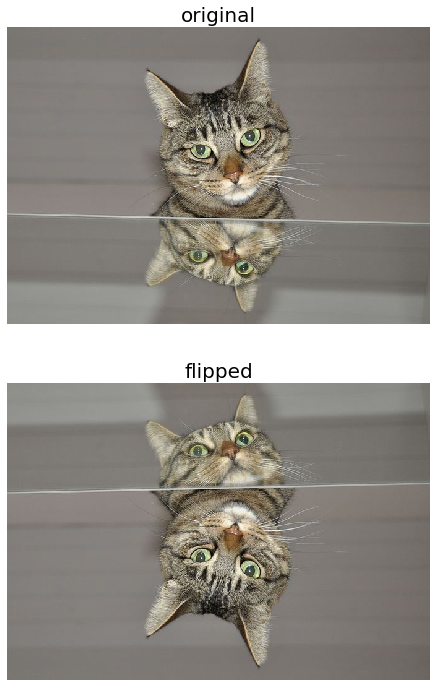

In [9]:
plt.figure(figsize=(10, 12))
plt.subplot(211), plt.imshow(im), plt.axis('off'), plt.title('original', size=20)
plt.subplot(212), plt.imshow(im_filpped), plt.axis('off'), plt.title('flipped', size=20) #np.fliplr(im)
plt.show()

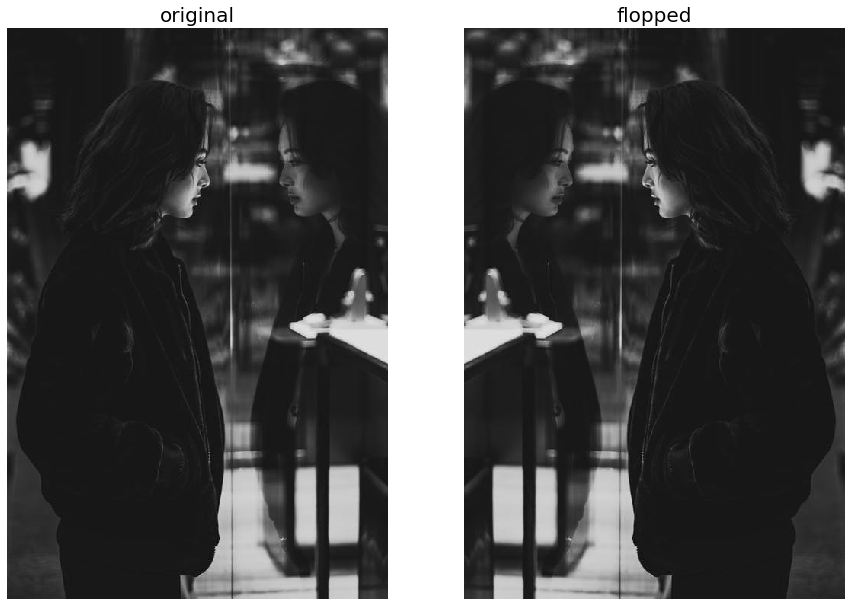

In [14]:
im = plt.imread('images/Img_02_43.jpeg')
im_filpped = np.fliplr(im)
plt.figure(figsize=(15, 12))
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('original', size=20)
plt.subplot(122), plt.imshow(im_filpped), plt.axis('off'), plt.title('flopped', size=20) #np.fliplr(im)
plt.show()

### 1.3 Applying Affine Transformation with *scipy.ndimage*

In [76]:
from skimage.io import imread
from scipy.ndimage import affine_transform
import numpy as np
import matplotlib.pylab as plt

In [77]:
im = imread("images/Img_02_01.jpg")
rot_mat = np.array([[np.cos(np.pi/4),np.sin(np.pi/4), 0],[-np.sin(np.pi/4),np.cos(np.pi/4), 0], [0,0,1]])
shr_mat = np.array([[1, 0.45, 0], [0, 0.75, 0], [0, 0, 1]])
transformed = affine_transform(im, rot_mat@shr_mat, offset=[-im.shape[0]/4+25, im.shape[1]/2-50, 0], output_shape=im.shape)

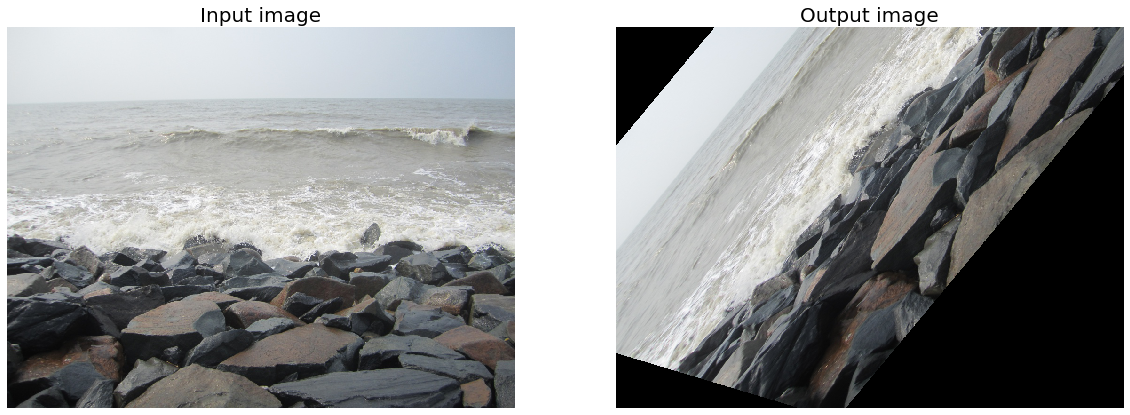

In [79]:
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('Input image', size=20)
plt.subplot(122), plt.imshow(transformed), plt.axis('off'), plt.title('Output image', size=20)
plt.show()

## 2. Implement Image Transformation with Warping / Inverse Warping using scikit-image and scipy.ndimage

### 2.1 Applying translation on an image using scikit-image warp

In [70]:
from skimage.io import imread
from skimage.transform import warp
import matplotlib.pylab as plt

In [71]:
def translate(xy, t_x, t_y):
 xy[:, 0] -= t_y
 xy[:, 1] -= t_x
 return xy

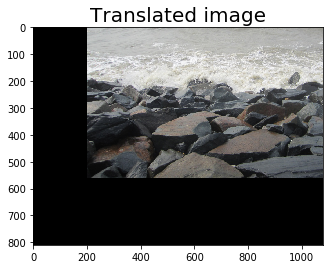

In [72]:
im = imread('images/Img_02_01.jpg')
im = warp(im, translate, map_args={'t_x':-250, 't_y':200}) # create a dictionary for translation parameters
plt.imshow(im)
plt.title('Translated image', size=20)
plt.show()

### 2.2 Implementing the Swirl transformation using scikit-image warp

In [ ]:
def swirl(xy, x0, y0, R):
    r = np.sqrt((xy[:,1]-x0)**2 + (xy[:,0]-y0)**2)
    a = np.pi*r / R
    xy[:, 1] = (xy[:, 1]-x0)*np.cos(a) + (xy[:, 0]-y0)*np.sin(a) + x0
    xy[:, 0] = -(xy[:, 1]-x0)*np.sin(a) + (xy[:, 0]-y0)*np.cos(a) + y0
    return xy

(480, 720, 3)


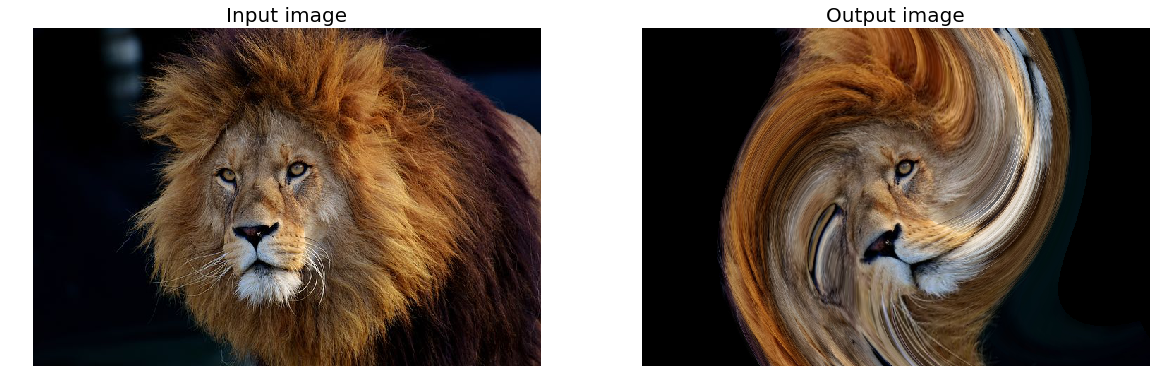

In [34]:
im = imread('images/Img_02_02.jpg')
print(im.shape)
im1 = warp(im, swirl, map_args={'x0':220, 'y0':360, 'R':650})
plt.figure(figsize=(20,10))
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('Input image', size=20)
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('Output image', size=20)
plt.show()

### 2.3 Implementing Swirl Transform using *scipy.ndimage* 

In [ ]:
from scipy import ndimage as ndi
from skimage.io import imread
from skimage.color import rgb2gray
import matplotlib.pylab as plt, numpy as np

In [ ]:
def apply_swirl(xy, x0, y0, R):                                                                        
    r = np.sqrt((xy[1]-x0)**2 + (xy[0]-y0)**2)
    a = np.pi*r / R
    return ((xy[1]-x0)*np.cos(a) + (xy[0]-y0)*np.sin(a) + x0, -(xy[1]-x0)*np.sin(a) + (xy[0]-y0)*np.cos(a) + y0)

(220, 220)


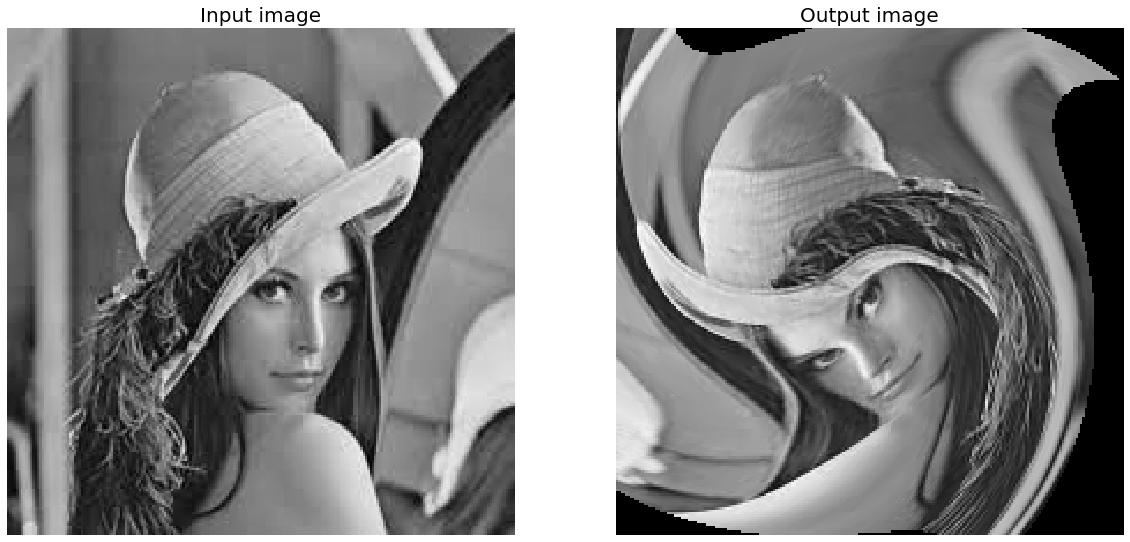

In [4]:
im = rgb2gray(imread('images/Img_02_06.jpg'))
print(im.shape)
im1 = ndi.geometric_transform(im, apply_swirl, extra_arguments=(100, 100, 250))
plt.figure(figsize=(20,10))
plt.gray()
plt.subplot(121), plt.imshow(im), plt.axis('off'), plt.title('Input image', size=20)
plt.subplot(122), plt.imshow(im1), plt.axis('off'), plt.title('Output image', size=20)
plt.show()

### 2.4 Implementing Elastic Deformation 

In [4]:
import numpy as np
import matplotlib.pylab as plt
from skimage.color import rgb2gray
from scipy.ndimage import gaussian_filter, map_coordinates 

In [5]:
def elastic_transform(image, alpha, sigma):
    random_state = np.random.RandomState(None)
    h, w = image.shape
    dx = gaussian_filter((random_state.rand(*image.shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    dy = gaussian_filter((random_state.rand(*image.shape) * 2 - 1), sigma, mode="constant", cval=0) * alpha
    x, y = np.meshgrid(np.arange(w), np.arange(h))
    indices = np.reshape(y+dy, (-1, 1)), np.reshape(x+dx, (-1, 1))
    distored_image = map_coordinates(image, indices, order=1, mode='reflect')
    return distored_image.reshape(image.shape)

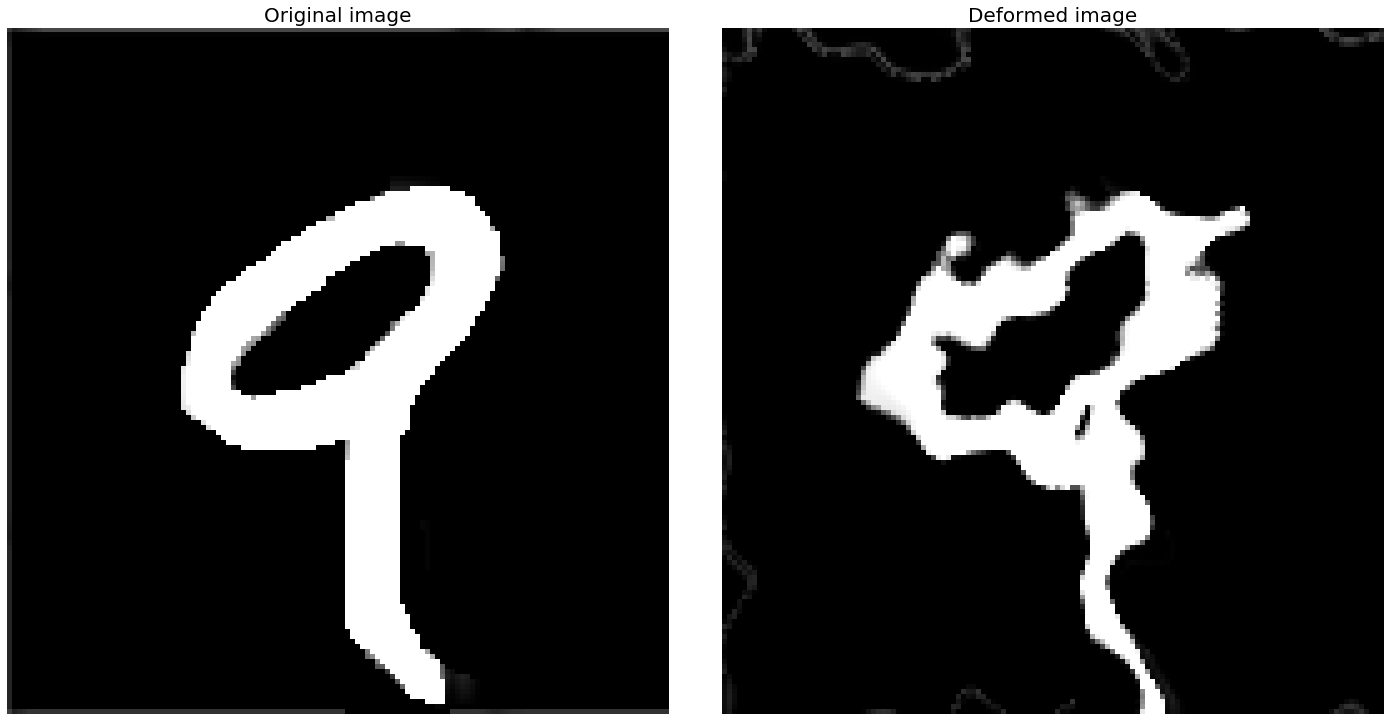

In [15]:
img = rgb2gray(plt.imread('images/Img_02_22.png'))
img1 = elastic_transform(img, 100, 4)
plt.figure(figsize=(20,10))
plt.gray()
plt.subplot(121), plt.imshow(img), plt.axis('off'), plt.title('Original image', size=20)
plt.subplot(122), plt.imshow(img1), plt.axis('off'), plt.title('Deformed image', size=20)
plt.tight_layout()
plt.show()

## 3. Image Projection with Homography using scikit-image

In [8]:
from skimage.transform import ProjectiveTransform
from skimage.io import imread
import numpy as np
import matplotlib.pylab as plt
from matplotlib.path import Path

In [6]:
im_src = imread('images/Img_02_04.jpg')
im_dst = imread('images/Img_02_03.jpg')
print(im_src.shape, im_dst.shape)
# (379, 262, 3) (321, 450, 3)

(379, 261, 3) (321, 450, 3)


In [7]:
pt = ProjectiveTransform()

width, height = im_src.shape[0], im_src.shape[1]
src = np.array([[   0.,    0.],
       [height-1,    0.],
       [height-1,  width-1],
       [   0.,  width-1]])
dst = np.array([[ 74.,  41.],
       [ 272.,  96.],
       [ 272.,  192.],
       [ 72.,  228.]])

pt.estimate(src, dst)

True

In [9]:
width, height = im_dst.shape[0], im_dst.shape[1]

polygon = dst
poly_path = Path(polygon)

x, y = np.mgrid[:height, :width]
coors = np.hstack((x.reshape(-1, 1), y.reshape(-1,1))) 

mask = poly_path.contains_points(coors)
mask = mask.reshape(height, width)

dst_indices = np.array([list(x) for x in list(zip(*np.where(mask > 0)))])
#print(dst_indices)

In [ ]:
src_indices = np.round(pt.inverse(dst_indices), 0).astype(int)
src_indices[:,0], src_indices[:,1] = src_indices[:,1], src_indices[:,0].copy()
im_out = np.copy(im_dst)
im_out[dst_indices[:,1], dst_indices[:,0]] = im_src[src_indices[:,0], src_indices[:,1]]

(379, 261, 3) (321, 450, 3)


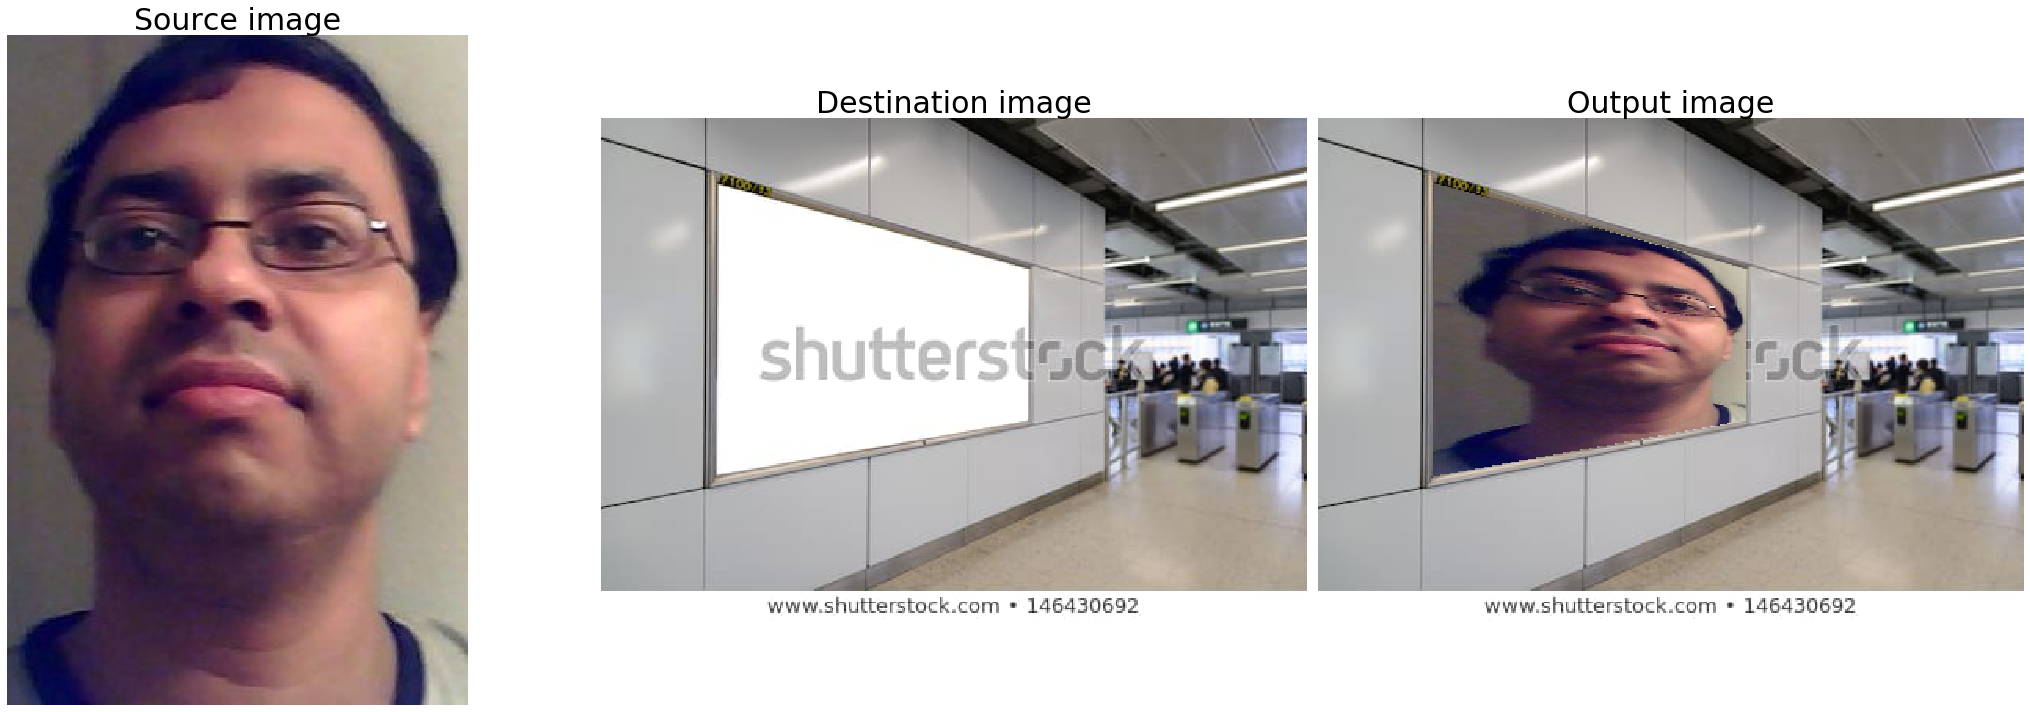

In [1]:
plt.figure(figsize=(30,10))
plt.subplot(131), plt.imshow(im_src, cmap='gray'), plt.axis('off'), plt.title('Source image', size=30)
plt.subplot(132), plt.imshow(im_dst, cmap='gray'), plt.axis('off'), plt.title('Destination image', size=30)
plt.subplot(133), plt.imshow(im_out, cmap='gray'), plt.axis('off'), plt.title('Output image', size=30)
plt.tight_layout()
plt.show()

## 4. Detecting Colors and Changing Colors of Objects with opencv-python

In [8]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread("images/Img_02_05.png")

In [9]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [10]:
mask = cv2.inRange(hsv, (0, 70, 25), (15, 255, 255))
imask = mask>0
brown = np.zeros_like(img)
brown[imask] = img[imask]

In [11]:
black = img.copy()
hsv[...,0:3] = hsv[...,0:3] / 3
black[imask] = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)[imask]
black = np.clip(black, 0, 255)

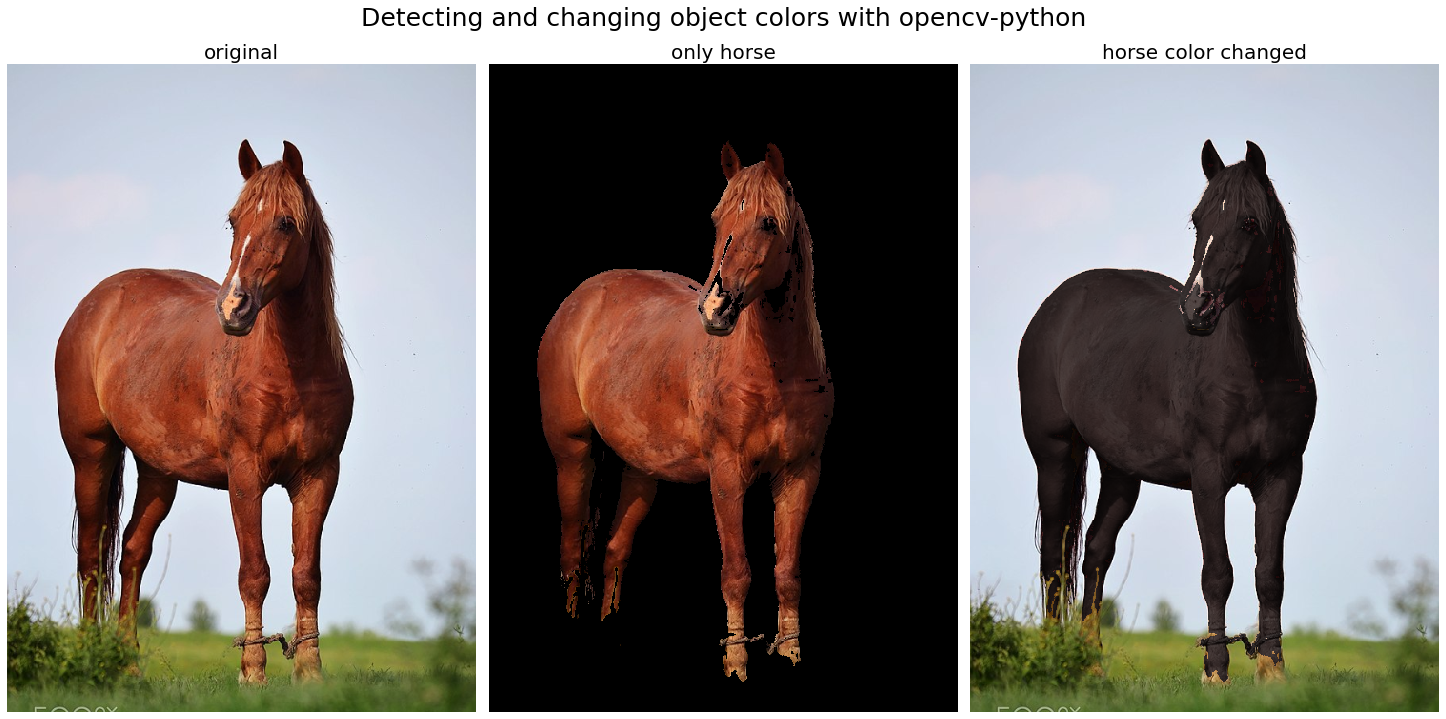

In [12]:
plt.figure(figsize=(20,10))
plt.subplots_adjust(0,0,1,0.9,0.01,0.075)
plt.subplot(131), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('original', size=20)
plt.subplot(132), plt.imshow(cv2.cvtColor(brown, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('only horse', size=20)
plt.subplot(133), plt.imshow(cv2.cvtColor(black, cv2.COLOR_BGR2RGB)), plt.axis('off'), plt.title('horse color changed', size=20)
plt.suptitle('Detecting and changing object colors with opencv-python', size=25)
plt.show()

### Detecting Covid-19 Virus Objects with Colors in HSV colorspace

In [47]:
img = cv2.cvtColor(cv2.imread('covid_19_blood.jpg'), cv2.COLOR_BGR2RGB)
img_hsv=cv2.cvtColor(img, cv2.COLOR_RGB2HSV)

In [50]:
low_green = np.array([30, 25, 10])
high_green = np.array([80, 255, 255])
green_mask = cv2.inRange(img_hsv, low_green, high_green)
green = cv2.bitwise_and(img, img, mask=green_mask)

In [52]:
output_img = img.copy()
output_img[np.where(green_mask==0)] = (0,0,0)

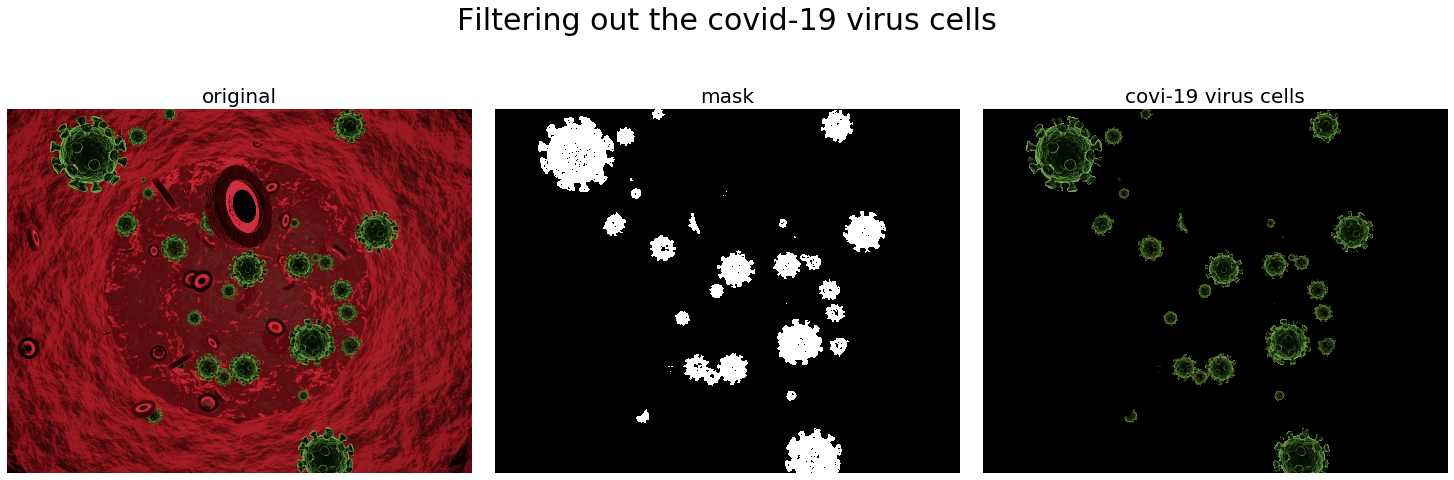

In [53]:
plt.figure(figsize=(20, 8))
plt.gray()
plt.subplots_adjust(0,0,1,0.975,0.05,0.05)
plt.subplot(131), plt.imshow(img), plt.axis('off'), plt.title('original', size=20)
plt.subplot(132), plt.imshow(green_mask), plt.axis('off'), plt.title('mask', size=20)
plt.subplot(133), plt.imshow(output_img), plt.axis('off'), plt.title('covi-19 virus cells', size=20)
plt.suptitle('Filtering out the covid-19 virus cells', size=30)
plt.show()

## 5. Finding Duplicate and Similar Images with Hashing

### 5.1 Using Cryptographic (MD5) Hash functions to find duplicate images with hashlib

In [31]:
import hashlib, os
from glob import glob
import matplotlib.pylab as plt
from skimage.io import imread
from time import time

In [39]:
hex_digest = hashlib.md5(open('images/Img_02_01.jpg', 'rb').read()).hexdigest()
bin_digest = format(int(str(hex_digest), 16), "040b")
print('MD5 digest = {} ({})'.format(hex_digest, bin_digest) )
print('length of hex digest = {} bytes'.format(len(hex_digest)))
print('length of bin digest = {} bits'.format(len(bin_digest)))

MD5 digest = 8335f826c77f68640f21bbf9ac784bad (10000011001101011111100000100110110001110111111101101000011001000000111100100001101110111111100110101100011110000100101110101101)
length of hex digest = 32 bytes
length of bin digest = 128 bits


In [29]:
def find_duplicates(dir_name):
    def is_image(file_name):
        f = file_name.lower()
        return f.endswith(".png") or f.endswith(".jpg")
    
    hash_keys = dict()
    for file_name in glob(dir_name): 
        if os.path.isfile(file_name) and is_image(file_name):
            with open(file_name, 'rb') as f:
                file_hash = hashlib.md5(f.read()).hexdigest()
            if file_hash not in hash_keys: 
                hash_keys[file_hash] = [file_name]
            else:
                hash_keys[file_hash].append(file_name)
    return [hash_keys[file_hash] for file_hash in hash_keys if len(hash_keys[file_hash]) > 1]

In [30]:
def show_duplicates(duplicates):
    for duplicated in duplicates:
        try:
            plt.figure(figsize=(20,10))
            plt.subplots_adjust(0,0,1,0.9,0.05,0.05)
            for (i, file_name) in enumerate(duplicated):
                plt.subplot(1, len(duplicated), i+1)
                plt.imshow(imread(file_name))
                plt.title(file_name, size=20)
                plt.axis('off')
            plt.suptitle('{} duplicate images found with MD5 hash'.format(len(duplicated)), size=30)
            plt.show()
        except OSError as e:
            continue

[['images\\Img_02_11.jpg', 'images\\Img_02_15.jpg', 'images\\Img_02_29.jpg'], ['images\\Img_02_13.jpg', 'images\\Img_02_30.jpg']]


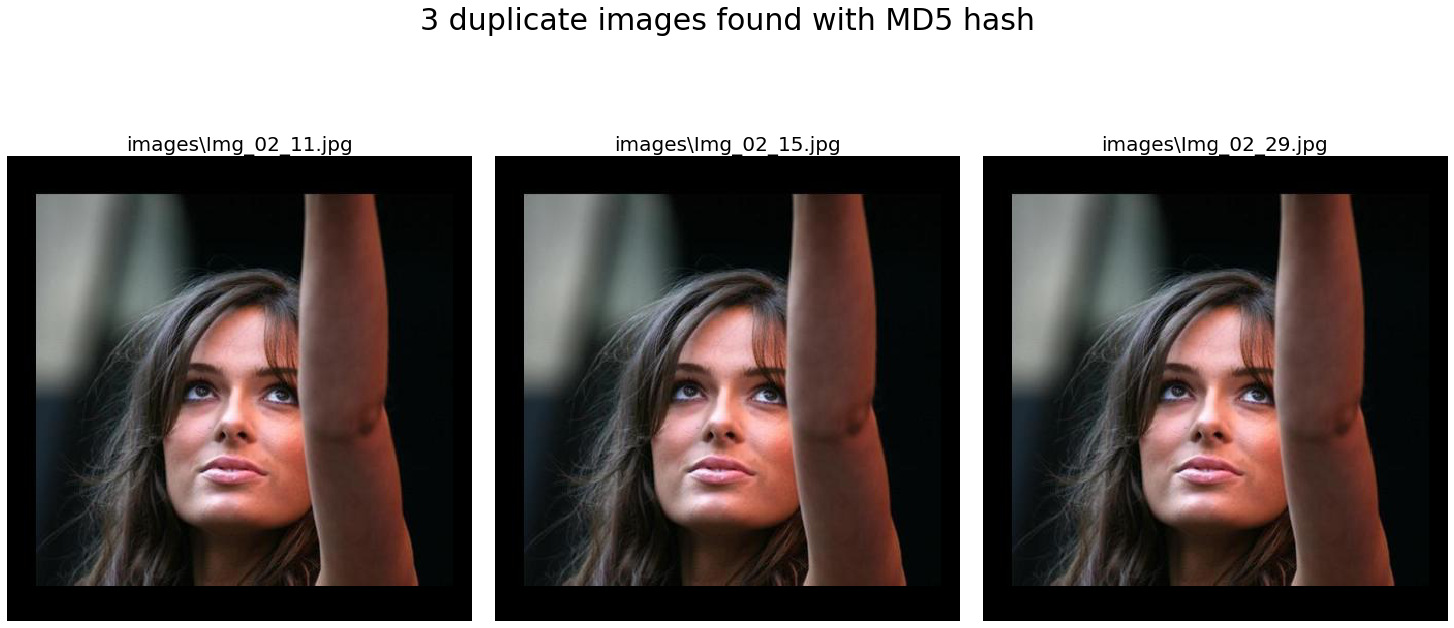

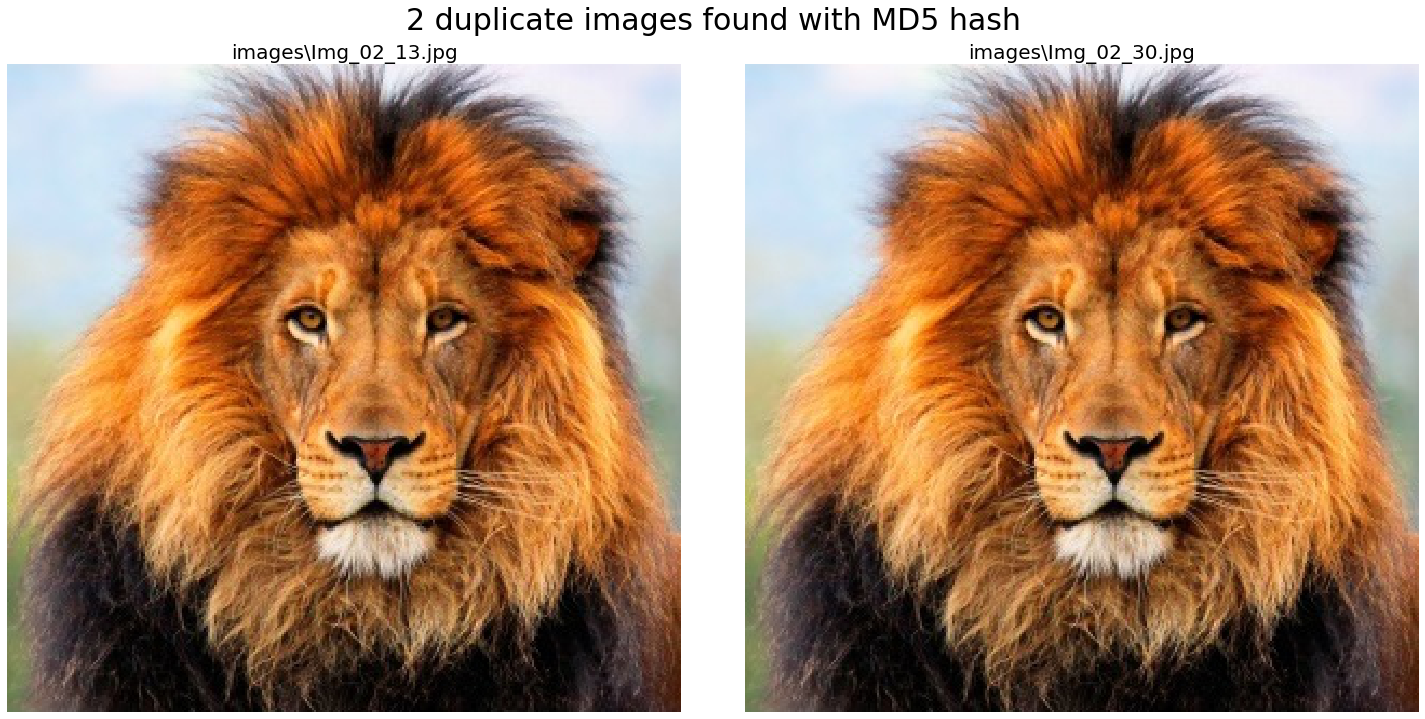

In [31]:
duplicates = find_duplicates('images/*.*')
print(duplicates)
show_duplicates(duplicates)

### 5.2 Using Perceptual Hash function (phash) to find similar images using imagehash

In [40]:
# install image hash with pip, if not already installed
#!pip install imagehash
from PIL import Image
import imagehash
from time import time
import os 
from glob import glob
import matplotlib.pylab as plt

In [44]:
def plot_images_to_compare(imfile1, imfile2, hashfunc = imagehash.phash):
    img1, img2 = Image.open(imfile1), Image.open(imfile2)
    print('sizes of images = {}, {}'.format(img1.size, img2.size))
    hash1 = hashfunc(img1)
    hash2 = hashfunc(img2)
    plt.figure(figsize=(20,10))
    plt.subplots_adjust(0,0,1,0.95,0.01,0.01)
    plt.subplot(121), plt.imshow(img1), plt.title(str(hash1), size=20), plt.axis('off')
    plt.subplot(122), plt.imshow(img2), plt.title(str(hash2), size=20), plt.axis('off')
    plt.show()
    print('hash1 = {} ({}), length = {} bits'.format(format(int(str(hash1), 16), "040b"), str(hash1), \
                                                     len(format(int(str(hash1), 16), "040b"))))
    print('hash2 = {} ({}), length = {} bits'.format(format(int(str(hash2), 16), "040b"), str(hash2), \
                                                     len(format(int(str(hash2), 16), "040b"))))
    print('hamming distance =', hash1 - hash2)

sizes of images = (300, 258), (300, 258)


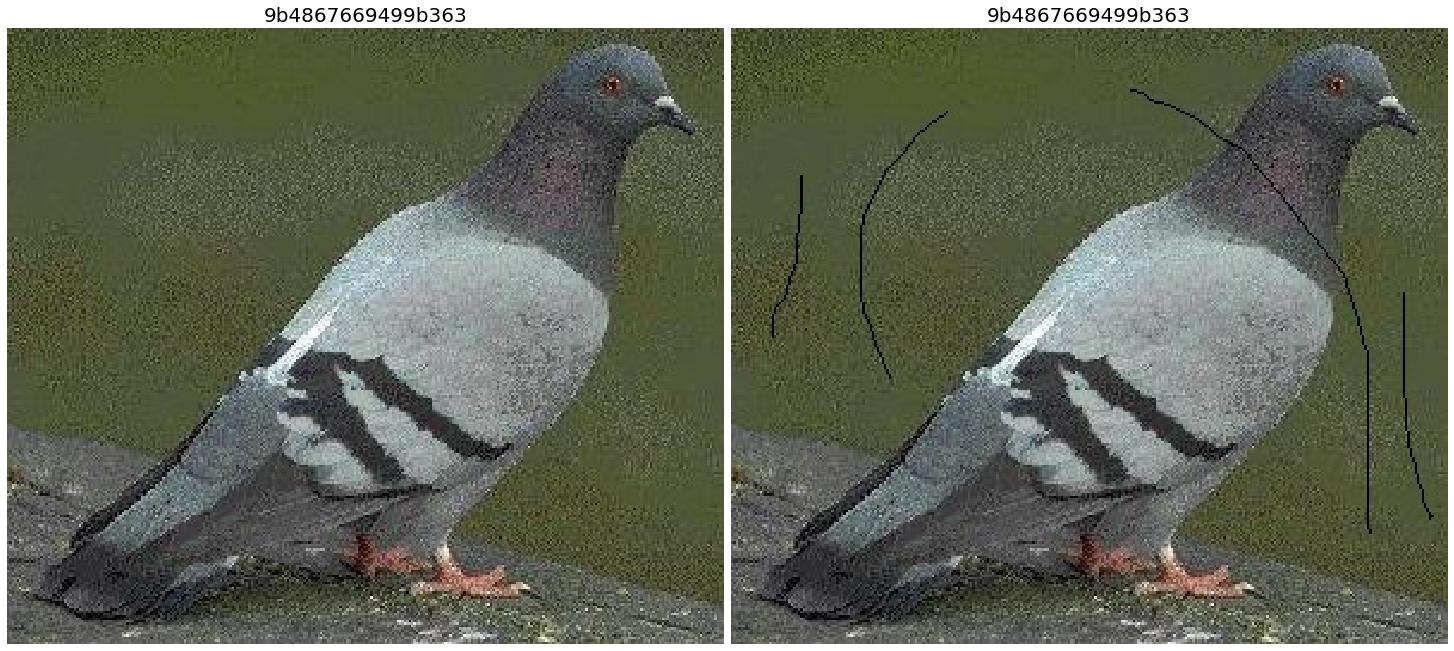

hash1 = 1001101101001000011001110110011010010100100110011011001101100011 (9b4867669499b363), length = 64 bits
hash2 = 1001101101001000011001110110011010010100100110011011001101100011 (9b4867669499b363), length = 64 bits
hamming distance = 0


In [45]:
plot_images_to_compare('images/Img_02_31.jpg', 'images/Img_02_32.jpg')

sizes of images = (300, 258), (300, 258)


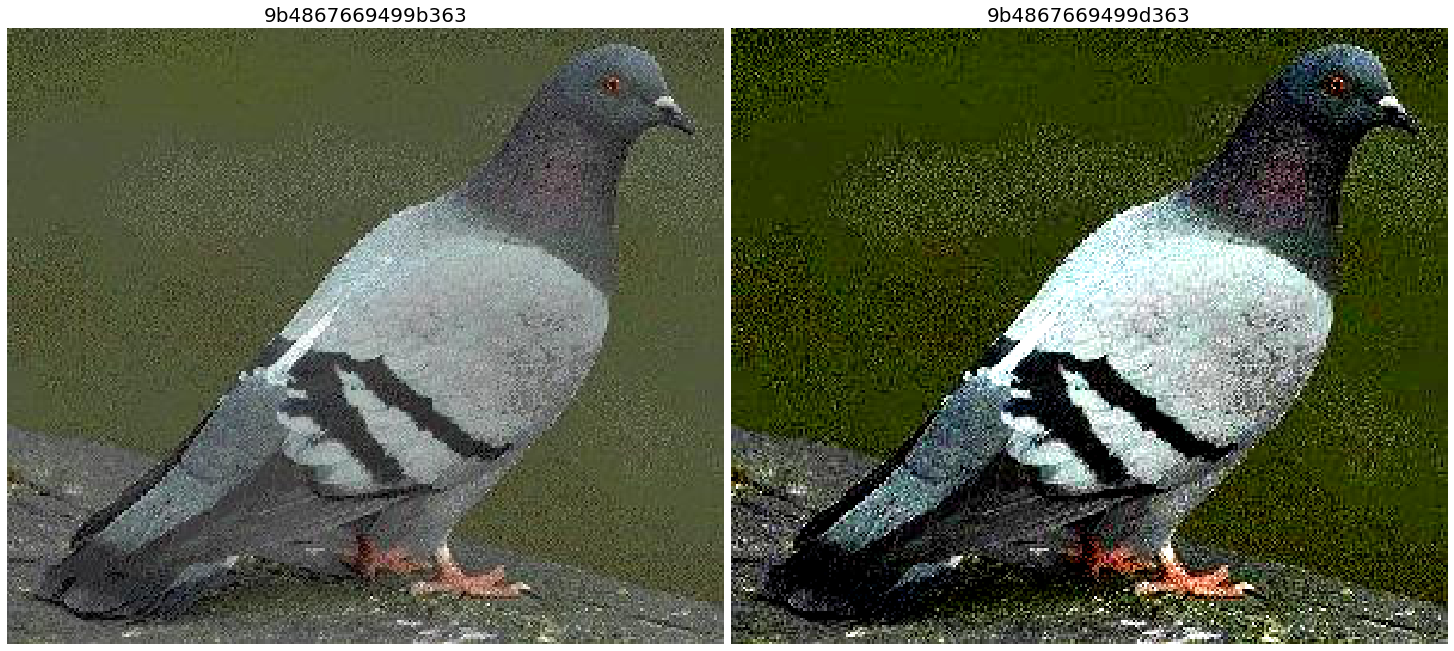

hash1 = 1001101101001000011001110110011010010100100110011011001101100011 (9b4867669499b363), length = 64 bits
hash2 = 1001101101001000011001110110011010010100100110011101001101100011 (9b4867669499d363), length = 64 bits
hamming distance = 2


In [58]:
plot_images_to_compare('images/Img_02_31.jpg', 'images/Img_02_43.png')

sizes of images = (1024, 683), (574, 383)


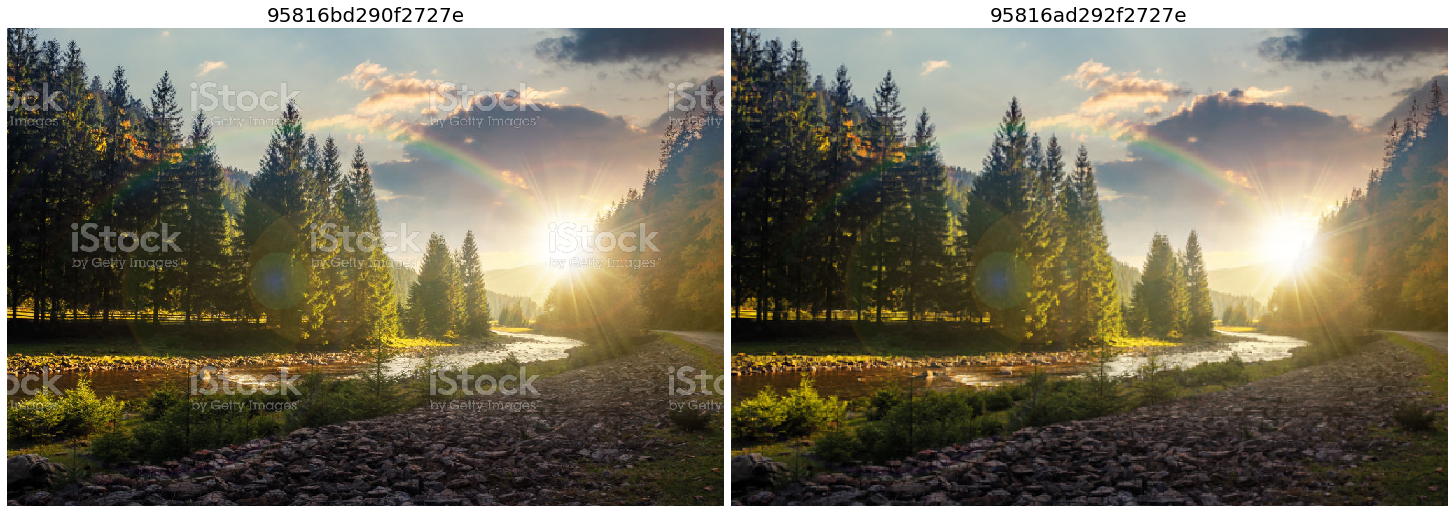

hash1 = 1001010110000001011010111101001010010000111100100111001001111110 (95816bd290f2727e)
hash2 = 1001010110000001011010101101001010010010111100100111001001111110 (95816ad292f2727e)
hamming distance = 2


In [151]:
plot_images_to_compare('images/similar/Img_02_41.jpg', 'images/similar/Img_02_41.png')

sizes of images = (300, 258), (399, 174)


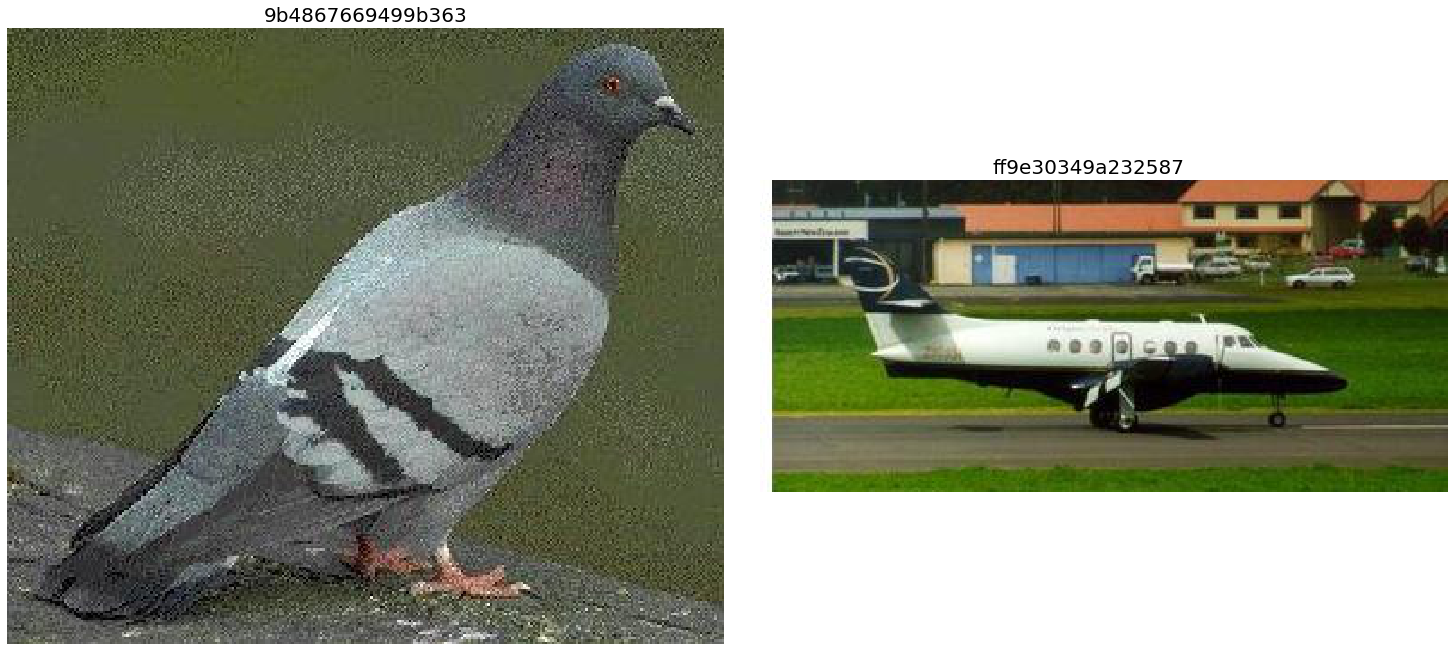

hash1 = 1001101101001000011001110110011010010100100110011011001101100011 (9b4867669499b363)
hash2 = 1111111110011110001100000011010010011010001000110010010110000111 (ff9e30349a232587)
hamming distance = 32


In [21]:
plot_images_to_compare('images/Img_02_31.jpg', 'images/Img_02_35.jpg')

In [60]:
def preprocess_images(dir_name, hashfunc = imagehash.phash):    
    image_filenames = sorted(glob(dir_name))
    print('number of images to process = {}'.format(len(image_filenames)))
    images = {}
    for img_file in sorted(image_filenames):
        hash = hashfunc(Image.open(img_file))
        images[hash] = images.get(hash, []) + [img_file]
    for hash in images:
        images[hash] = np.array(images[hash])
    return images

In [61]:
def query_k_similar_images(image_file, images, k=3, hashfunc = imagehash.phash):
    hash = hashfunc(Image.open(image_file))
    hamming_dists = np.zeros(len(images))
    image_files = np.array(list(images.values()))
    hash_values = list(images.keys())
    for i in range(len(image_files)):
        hamming_dists[i] = hash - hash_values[i]
    indices = np.argsort(hamming_dists)
    return np.hstack(image_files[indices][:k]), hamming_dists[indices][:k]

In [71]:
start = time()
images = preprocess_images('images/*.*')
end = time()
print('processing time = {} seconds'.format(end-start))

number of images to process = 42
processing time = 0.3982961177825928 seconds


In [72]:
def plot_query_returned_images(query, returned):
    n = 1 + len(returned)
    plt.figure(figsize=(20,8))
    plt.subplots_adjust(0,0,1,0.95,0.05,0.05)
    plt.subplot(1,n,1), plt.imshow(Image.open(query)), plt.title('query image', size=20), plt.axis('off')
    for i in range(len(returned)):
        plt.subplot(1,n,i+2), plt.imshow(Image.open(returned[i])), plt.title('returned image {}'.format(i+1), size=20)
        plt.axis('off')
    plt.show()

In [73]:
query = 'images/Img_02_39.jpg'
found, dists = query_k_similar_images(query, images, k=4)
dists

array([ 0., 10., 24., 24.])

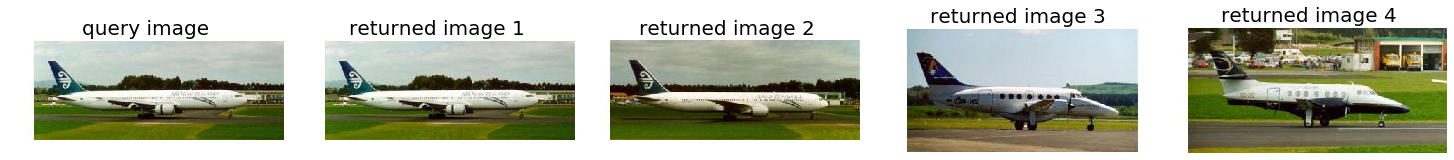

In [74]:
plot_query_returned_images(query, found)